# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [199]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [200]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [201]:
#  1. Get the total rides for each city type
sum_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
sum_rides.head(10)

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [202]:
# 2. Get the total drivers for each city type
sum_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
sum_drivers.head(10)

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [203]:
#  3. Get the total amount of fares for each city type
sum_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [204]:
#  4. Get the average fare per ride for each city type. 
mean_fare = sum_fares/sum_rides
mean_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [205]:
# 5. Get the average fare per driver for each city type. 
mean_fare_driver = sum_fares/sum_drivers
mean_fare_driver.head()

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [311]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
    {"Total revenue": sum_rides,
      "Total drivers": sum_drivers,
      "Total fares": sum_fares,
      "mean fare": mean_fare,
      "mean fare/drive": mean_fare_driver})
pyber_summary_df.head(5)

#issue

,Total revenue,Total drivers,Total fares,mean fare,mean fare/drive
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [312]:
pyber_summary_df = pyber_summary_df.reset_index()

In [307]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [313]:
#  8. Format the columns.
#issue
columns = ["Total revenue", "Total drivers", "Total fares", 
           "mean fare", "mean fare/drive"]
for x in columns:
        pyber_summary_df[x]=pyber_summary_df[x].map("{:.2f}".format)

In [314]:
pyber_summary_df

,type,Total revenue,Total drivers,Total fares,mean fare,mean fare/drive
0,Rural,125.00,78.00,4327.93,34.62,55.49
1,Suburban,625.00,490.00,19356.33,30.97,39.50
2,Urban,1625.00,2405.00,39854.38,24.53,16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [315]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [316]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_sum = pyber_data_df.groupby(["type", "date"]).sum([["fare"]])
fare_sum

fare        ride_id  driver_count
type  date                                                   
Rural 2019-01-01 09:45:36  43.69  2424875833354             1
      2019-01-02 11:18:32  52.12  3454018971635             1
      2019-01-03 19:51:01  19.90  5559509612597             8
      2019-01-04 03:31:26  24.88  4195619112933             8
      2019-01-06 07:38:40  47.33  3849747342021             4
...                          ...            ...           ...
Urban 2019-05-08 04:20:00  21.99   117997692054            52
      2019-05-08 04:39:49  18.45  1811574736337            11
      2019-05-08 07:29:01  18.55  5682021476085            33
      2019-05-08 11:38:35  19.77  7837163332630             4
      2019-05-08 13:10:18  18.04  5616262558026            58

[2375 rows x 3 columns]

In [317]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fare_sum = fare_sum.reset_index()
fare_sum

,type,date,fare,ride_id,driver_count
0,Rural,2019-01-01 09:45:36,43.69,2424875833354,1
1,Rural,2019-01-02 11:18:32,52.12,3454018971635,1
2,Rural,2019-01-03 19:51:01,19.90,5559509612597,8
3,Rural,2019-01-04 03:31:26,24.88,4195619112933,8
4,Rural,2019-01-06 07:38:40,47.33,3849747342021,4
...,...,...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99,117997692054,52
2371,Urban,2019-05-08 04:39:49,18.45,1811574736337,11
2372,Urban,2019-05-08 07:29:01,18.55,5682021476085,33
2373,Urban,2019-05-08 11:38:35,19.77,7837163332630,4


In [318]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
#table = pd.pivot_table(df,index=['Sex','Pclass'],values=['Survived'], aggfunc=np.mean)

byday_df = pd.pivot_table(pyber_data_df, index=['date'], columns=['type'],values=['fare'])

byday_df


fare                
type                Rural Suburban  Urban
date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-05-08 04:20:00   NaN      NaN  21.99
2019-05-08 04:39:49   NaN      NaN  18.45
2019-05-08 07:29:01   NaN      NaN  18.55
2019-05-08 11:38:35   NaN      NaN  19.77
2019-05-08 13:10:18   NaN      NaN  18.04

[2375 rows x 3 columns]

In [319]:
# 5. ATTEMPTED INCORRECTLY-Reference only: Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

#start_date = '2019-01-01'
#end_date = '2019-04-29 24:00:00'
#mask = (pivot['date'] > start_date) & (pivot['date'] <= end_date)
#spring2019=pivot.loc[(pivot[mask])]

#example
#df = pd.DataFrame(np.random.random((200,3)))
#df['date'] = pd.date_range('2000-1-1', periods=200, freq='D')
#mask = (df['date'] > '2000-6-1') & (df['date'] <= '2000-6-10')
#print(df.loc[mask])

#Attempt 1
#start_date = '2019-01-01 00:00:00'
#end_date = '2019-04-29 24:00:00'
#mask = (pivot['date'] > start_date) & (pivot['date'] <= end_date)
#spring2019=pivot.loc[(pivot[mask])]

#Attempt 2 (outputs by correct timestamps but not correct headers
#pyber_data_df = pd.DataFrame(np.random.random((200,3)))
#pyber_data_df['date'] = pd.date_range('2019-01-01', periods=200, freq='D')
#mask = (pyber_data_df['date'] > '2019-01-01') & (pyber_data_df['date'] <= '2019-04-29')
#pyber_data_df.loc[mask]


In [320]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
#Attempt 3:
byday_df = byday_df.loc['2019-01-01':'2019-04-28']
#byday_df = byday_df.set_index("date")

In [321]:
byday_df.tail()

fare                
type                 Rural Suburban  Urban
date                                      
2019-04-27 17:58:27  14.01      NaN    NaN
2019-04-27 19:45:48    NaN    28.84    NaN
2019-04-27 20:41:36    NaN      NaN   8.28
2019-04-27 23:26:03    NaN      NaN  19.06
2019-04-27 23:52:44    NaN    45.98    NaN

In [322]:
#pivot = byday_df.resample('W').sum()

In [323]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
byday_df.index = pd.to_datetime(byday_df.index)

byday_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (fare, Rural)     114 non-null    float64
 1   (fare, Suburban)  567 non-null    float64
 2   (fare, Urban)     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [324]:
# 7. Check that the datatype for the index is datetime using df.info()

pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1 entries, 1970-01-04 to 1970-01-04
Freq: W-SUN
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (fare, Rural)     1 non-null      float64
 1   (fare, Suburban)  1 non-null      float64
 2   (fare, Urban)     1 non-null      float64
dtypes: float64(3)
memory usage: 32.0 bytes


In [325]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week

byday_df_new = byday_df.resample('W').sum()
#pivot = pivot.reset_index()
byday_df_new

fare                  
type         Rural Suburban    Urban
date                                
2019-01-06  187.92   721.60  1661.68
2019-01-13   67.65  1105.13  2050.43
2019-01-20  306.00  1218.20  1939.02
2019-01-27  179.69  1203.28  2129.51
2019-02-03  333.08  1042.79  2086.94
2019-02-10  115.80   974.34  2162.64
2019-02-17   95.82  1045.50  2235.07
2019-02-24  419.06  1412.74  2466.29
2019-03-03  175.14   858.46  2218.20
2019-03-10  303.94   925.27  2470.93
2019-03-17  163.39   906.20  2044.42
2019-03-24  189.76  1122.20  2368.37
2019-03-31  199.42  1045.06  1942.77
2019-04-07  501.24  1010.73  2356.70
2019-04-14  269.79   784.82  2390.72
2019-04-21  214.14  1149.27  2303.80
2019-04-28  191.85  1169.04  1909.51

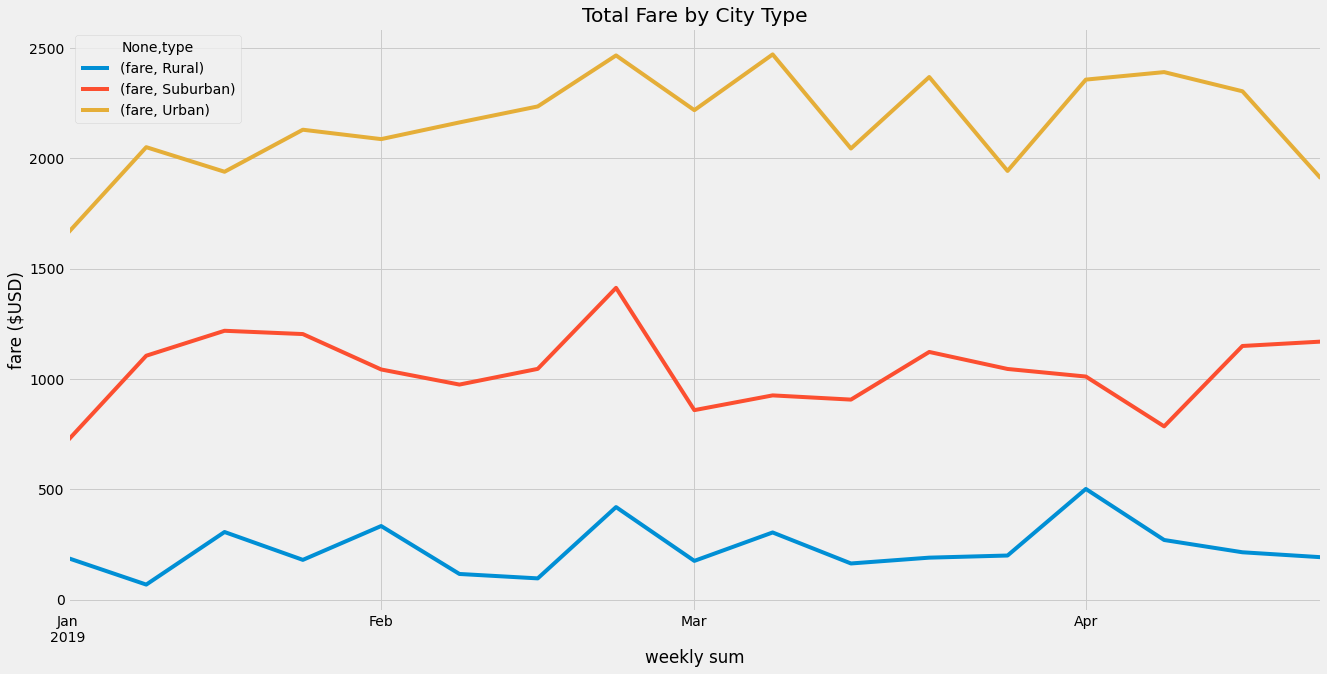

In [326]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style


# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
ax = byday_df_new.plot(figsize = (20, 10))
ax.set_title('Total Fare by City Type')
ax.set_ylabel('fare ($USD)')
ax.set_xlabel('weekly sum')
#pivot.reset_index
plt.show()
#pivot.plot()


# plt.plot(pivot["fare"pivot["Rural"])

# plt.title('Total Fare by City Type')
# plt.ylabel('fare ($USD)')
# plt.xlabel('weekly sum')
#plt.xlim("Jan","May")
#plt.ylim(0,3000)

#title = "Total Fare by City Type"
#x axis = fare ($USD)
#from matplotlib import figure
#figure(figsize=(8,3), dpi=100)

#import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"] = (10,3)

#plt.legend((Rural, Suburban, Urban), ('label1', 'label2', 'label3'))